In [1]:
import scipy.sparse as ss
import numpy as np
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import time
import japanize_matplotlib # pip install japanize-matplotlib
import pyswarms as ps
import math
import jpholiday
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

ODPATH = 'data/od_day20180101_20210228.npz'
OD_DAYS = [date.strftime('%Y-%m-%d') for date in pd.date_range(start='2020-01-01', end='2021-02-28', freq='1D')]
print(len(OD_DAYS))

data = ss.load_npz(ODPATH)
data = np.array(data.todense())
data = data[-len(OD_DAYS):, :]
scaler = StandardScaler()
pt = PowerTransformer()
qt = QuantileTransformer(output_distribution='normal')
data0 = np.log(data+1.0)
data1 = scaler.fit_transform(data) # original_data = scaler.inverse_transform(data1)
data2 = pt.fit_transform(data)
data3 = qt.fit_transform(data)
print('data0.shape, data1.shape', 'data2.shape', 'data3.shape', data0.shape, data1.shape, data2.shape, data3.shape)


Bad key text.latex.unicode in file /home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/jiang/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://gi

425


/home/jiang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/jiang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:2615: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


data0.shape, data1.shape data2.shape data3.shape (425, 2209) (425, 2209) (425, 2209) (425, 2209)


14.254364664192764 0.0


(array([4.43854e+05, 9.47390e+04, 8.03350e+04, 7.00550e+04, 5.56060e+04,
        4.36000e+04, 3.57740e+04, 3.07700e+04, 2.41040e+04, 1.37580e+04,
        1.14960e+04, 7.77100e+03, 3.45200e+03, 1.12800e+03, 3.16100e+03,
        8.45000e+03, 6.22300e+03, 2.30100e+03, 1.94900e+03, 2.99000e+02]),
 array([ 0.        ,  0.71271823,  1.42543647,  2.1381547 ,  2.85087293,
         3.56359117,  4.2763094 ,  4.98902763,  5.70174587,  6.4144641 ,
         7.12718233,  7.83990057,  8.5526188 ,  9.26533703,  9.97805526,
        10.6907735 , 11.40349173, 12.11620996, 12.8289282 , 13.54164643,
        14.25436466]),
 <BarContainer object of 20 artists>)

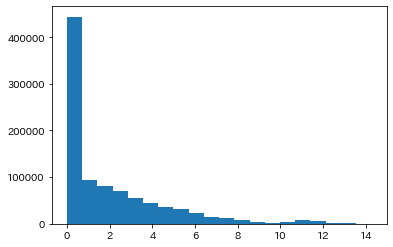

In [2]:
#log
print(np.max(data0), np.min(data0))
plt.hist(data0.ravel(), bins=20)

17.57053158790035 -4.14680415224563


(array([4.90000e+01, 1.51800e+03, 8.26290e+04, 6.01281e+05, 1.59925e+05,
        6.24130e+04, 1.98480e+04, 6.66600e+03, 2.53500e+03, 1.09200e+03,
        4.80000e+02, 1.93000e+02, 9.00000e+01, 4.70000e+01, 1.50000e+01,
        2.10000e+01, 7.00000e+00, 1.20000e+01, 2.00000e+00, 2.00000e+00]),
 array([-4.14680415, -3.06093737, -1.97507058, -0.88920379,  0.196663  ,
         1.28252978,  2.36839657,  3.45426336,  4.54013014,  5.62599693,
         6.71186372,  7.7977305 ,  8.88359729,  9.96946408, 11.05533087,
        12.14119765, 13.22706444, 14.31293123, 15.39879801, 16.4846648 ,
        17.57053159]),
 <BarContainer object of 20 artists>)

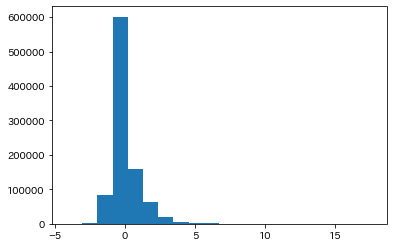

In [3]:
# StandardScaler
print(np.max(data1), np.min(data1))
plt.hist(data1.ravel(), bins=20)

14.543039572248992 -6.24320093749564


(array([6.00000e+00, 3.50000e+01, 5.24000e+02, 8.19600e+03, 8.74940e+04,
        4.69552e+05, 2.24713e+05, 1.19146e+05, 2.36730e+04, 3.52800e+03,
        1.25600e+03, 4.87000e+02, 1.15000e+02, 6.30000e+01, 2.30000e+01,
        8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 6.00000e+00]),
 array([-6.24320094e+00, -5.20388891e+00, -4.16457689e+00, -3.12526486e+00,
        -2.08595284e+00, -1.04664081e+00, -7.32878457e-03,  1.03198324e+00,
         2.07129527e+00,  3.11060729e+00,  4.14991932e+00,  5.18923134e+00,
         6.22854337e+00,  7.26785539e+00,  8.30716742e+00,  9.34647944e+00,
         1.03857915e+01,  1.14251035e+01,  1.24644155e+01,  1.35037275e+01,
         1.45430396e+01]),
 <BarContainer object of 20 artists>)

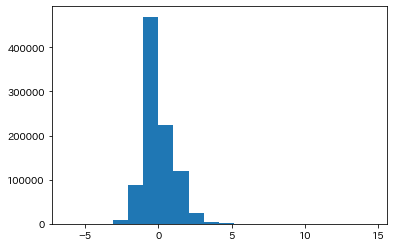

In [4]:
# PowerTransformer
print(np.max(data2), np.min(data2))
plt.hist(data2.ravel(), bins=20)

5.19933758270342 -5.199337582605575


(array([337375.,      0.,      0.,      0.,    576.,   4222.,  14403.,
         36803.,  72022., 109012., 127098., 110819.,  74611.,  34744.,
         11127.,   1822.,      0.,      0.,      0.,   4191.]),
 array([-5.19933758e+00, -4.67940382e+00, -4.15947007e+00, -3.63953631e+00,
        -3.11960255e+00, -2.59966879e+00, -2.07973503e+00, -1.55980127e+00,
        -1.03986752e+00, -5.19933758e-01,  4.89217555e-11,  5.19933758e-01,
         1.03986752e+00,  1.55980127e+00,  2.07973503e+00,  2.59966879e+00,
         3.11960255e+00,  3.63953631e+00,  4.15947007e+00,  4.67940382e+00,
         5.19933758e+00]),
 <BarContainer object of 20 artists>)

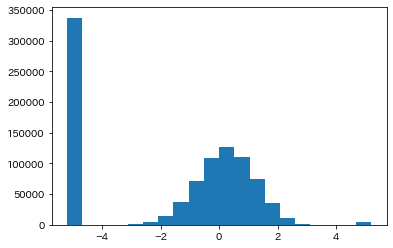

In [5]:
# QuantileTransformer
print(np.max(data3), np.min(data3))
plt.hist(data3.ravel(), bins=20)